In [2]:
import torch
import torch.nn.functional as F
from torch import nn

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
import pandas as pd
import numpy as np
import re

In [13]:
with open("/content/linux_input.txt", "r", errors="ignore") as f:
    text = f.read()
    text = text.lower()
    text = re.sub('["\n\n"]', "   ", text)
    text = re.sub('[^a-z0-9 \.]', '', text)

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-605195163.py:5: SyntaxWarning: invalid escape sequence '\.'
  text = re.sub('[^a-z0-9 \.]', '', text)


In [14]:
text = text.strip()
text = text.split("   ")
text = [i for i in text if i != '']
#print(text[:500])
text = [i.replace(".","") for i in text]

X1, y1 = [],[]
#k,n = 0,0
for i in text:
  cxt = 5
  out = cxt*["."]
  if i.strip().split() != []:
    X1.append(out.copy())
    y1.append(i.strip().split()[0])
  for j in range (len(i.strip().split())-1):
    #print(out[1:4])
    out[0:4] = out[1:5]
    #print(out[0:3])
    out[4] = i.strip().split()[j]
    #print(out[1:4])
    #Why? copy()
    X1.append(out.copy())
    y1.append(i.strip().split()[j+1])


X,X_test,y,y_test = [],[],[],[]
k = 0
for i in range (len(X1)):
  if X1[i] == [".",".",".",".","."]:
    k += 1
  if k < 13600:
    X.append(X1[i])
    y.append(y1[i])
  else:
    X_test.append(X1[i])
    y_test.append(y1[i])

In [15]:
word = sorted(list(set(y1)))

w_ = ["."]
w_.extend(word)

emb_d = 32
emb_l = len(word)
emb = torch.nn.Embedding(emb_l,emb_d)

In [16]:
class nxt_word(nn.Module):
  def __init__(self, cxt, emb_l, emb_d, size):
    super().__init__()
    self.emb = nn.Embedding(emb_l, emb_d)
    self.lin1 = nn.Linear(cxt * emb_d, size)
    self.lin2 = nn.Linear(size, emb_l)

  def forward(self, x):
    x = self.emb(x)
    x = x.view(x.shape[0], -1)
    x = torch.relu(self.lin1(x))
    x = self.lin2(x)
    return x

In [17]:
#model = nxt_word(cxt, emb_l, emb_d, size = 1024).to(device)
state_dict = torch.load("/content/model2.pth", map_location="cpu")
#model.load_state_dict(state_dict)
#model.eval()

In [ ]:
#emb_ = model.embeddings
#emb_.weight

In [18]:
emb_ = state_dict["_orig_mod.emb.weight"]

In [19]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [20]:
dta = pd.DataFrame(emb_)
dta["Lbl"] = np.arange(len(w_))
dta.columns = dta.columns.astype(str)
dta

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Lbl
0,0.003037,-0.065404,0.224999,-0.583679,0.602141,0.641869,0.010436,-0.176069,0.440920,0.246172,...,-0.675399,0.715336,0.628540,1.359405,-0.427044,1.477638,-0.354057,0.108510,0.265898,0
1,0.104316,0.903159,-0.933032,-0.247216,0.958146,1.030368,-0.063955,-1.089619,0.416378,0.196448,...,0.461709,0.893676,-0.201353,-0.402246,-0.128130,-0.616128,0.287644,1.216452,2.125188,1
2,2.290473,-0.117431,-0.643815,-0.284416,0.170735,0.963449,2.096084,0.589771,0.410481,-1.032444,...,0.859195,1.224557,-0.866681,-0.372763,-1.191492,0.258854,1.038201,0.569046,-1.556530,2
3,-0.794552,-0.307499,-0.007822,0.172008,-1.045877,-1.359815,1.252698,-1.011569,0.573984,-0.312866,...,-0.408900,-1.239405,-0.550425,0.726909,0.126414,-0.457155,-0.127642,-0.839536,-0.533091,3
4,-0.172422,-0.120964,0.795871,0.671406,0.794224,-0.202021,1.248548,-0.460212,0.981937,-0.098423,...,-1.181675,-0.307634,0.094374,0.323296,0.975517,0.156031,-0.725856,0.148067,0.253788,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69103,1.003565,-0.192621,-0.220641,0.958292,-0.408691,-0.444610,2.408284,-1.557881,-0.031198,0.844928,...,1.789229,-0.032176,0.114090,-0.440957,1.567123,0.214402,-0.556351,-0.780522,-2.304749,69103
69104,0.729169,-1.477270,1.059084,1.012877,-0.829289,1.942450,0.691292,0.393907,-0.694236,1.127410,...,-0.522087,-1.261745,-0.749095,1.440212,-0.829200,-0.531098,0.886249,-0.265439,0.840804,69104
69105,-1.466652,-0.758250,-0.861831,0.079271,-0.502224,-1.532777,-1.136978,1.548304,0.140040,1.151025,...,0.861190,-0.046696,0.706886,-1.419670,1.937222,0.387011,-1.159250,0.072262,1.520904,69105
69106,-0.911079,0.640946,-1.344396,0.925375,0.748867,0.605213,-0.092227,0.622097,-0.877833,0.089019,...,1.221036,-1.117478,-0.181026,-0.482162,0.954724,-1.202568,-0.758460,-0.399327,1.737936,69106


In [21]:
s_dta = StandardScaler().fit_transform(dta)

In [22]:
mdl = TSNE(n_components = 2, random_state = 42)
tsne_dta = mdl.fit_transform(s_dta)
tsne_dta = np.vstack((tsne_dta.T, np.arange(len(w_)))).T
df = pd.DataFrame(tsne_dta, columns = ["X","Y","LABEL"])
#sns.scatterplot(df, x = "X", y = "Y", hue = "LABEL", palette = "bright")
#plt.show

In [23]:
df

,X,Y,LABEL
0,5.004783,30.961649,0.0
1,-48.141277,26.536758,1.0
2,3.759971,-0.167539,2.0
3,24.345598,14.658279,3.0
4,-4.519000,14.601825,4.0
...,...,...,...
69103,-36.435360,-20.574560,69103.0
69104,30.613157,-42.312061,69104.0
69105,-24.195711,-36.403305,69105.0
69106,-15.537799,-37.205170,69106.0


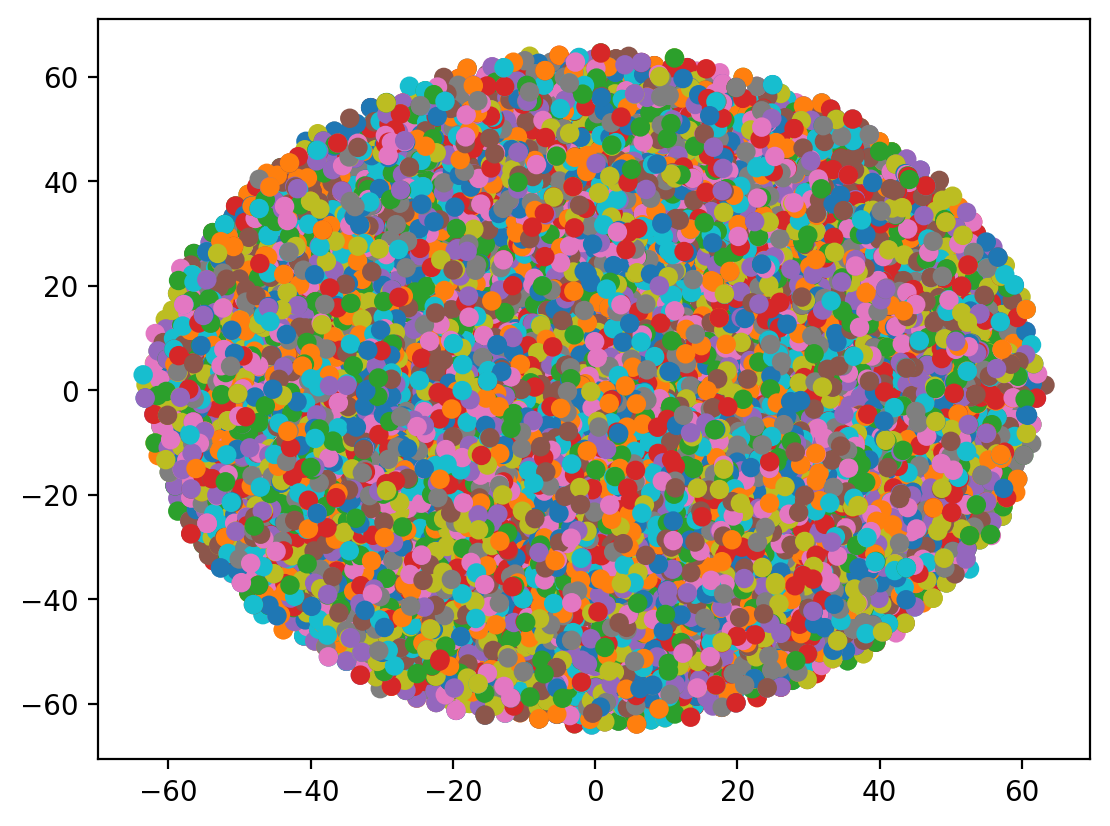

In [25]:
colors = plt.cm.tab10.colors
clr_map = {label: colors[i % len(colors)] for i, label in enumerate(w_)}
clrs = [clr_map[l] for l in w_]
plt.scatter(df["X"], df["Y"], color = clrs)
plt.show()